---
title: ML Models on Creeds Data Using Reduced - TFIDF features (200 Dim)
authors:
- vikas.potnuru@elucidata.io
tags:
- Data Modelling
- TFIDF
- Binary Classification
created_at: 2019-06-19
updated_at: 2019-06-19
tldr: Here are the Machine learning Models applied on Creeds Data using Dimensionality reduction on TFIDF Features of 10000 dims i.e Top 10000 words and reduced it into 200 dims
---

# Importing Libraries

In [0]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        #ls
from google.colab import drive
drive.mount("/content/drive") 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import re
import operator
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import inaugural, stopwords
from wordcloud import WordCloud, STOPWORDS 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from operator import itemgetter 
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import xgboost,textblob, string
from sklearn import model_selection, preprocessing, linear_model, naive_bayes,svm
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Processing 

In [0]:
df_ctrl = pd.read_csv('drive/My Drive/creeds_control_data.csv')
print('columns:',end=' ')
print(df_ctrl.columns.values)
print('No of Data Points: ' + str(len(df_ctrl)))
df_ctrl = df_ctrl.replace(np.nan, '', regex=True)

df_ctrl['total'] = df_ctrl['title'].str.cat(' '+ df_ctrl['description'].str.cat(' '+ df_ctrl['characteristics_ch1'].str.cat(' '+ df_ctrl['source_name_ch1'])))
df_ctrl['total']  = df_ctrl['total'].replace('\s+', ' ', regex=True)
df_ctrl.to_csv('creeds_control_data.csv',index=False)

columns: ['sample_id' 'gse_id' 'ctrl' 'pert' 'title' 'description' 'type'
 'characteristics_ch1' 'source_name_ch1' 'total']
No of Data Points: 78061


# CTRL VS PERT

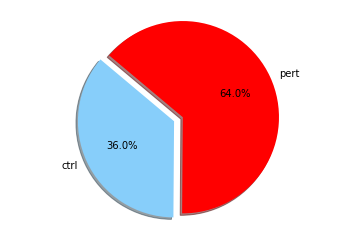

In [0]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'ctrl', 'pert'
sizes = [36, 64]
colors = ['lightskyblue','red']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Combining Title + Description + source_name + characteristics

In [0]:
# wordnet_lemmatizer = WordNetLemmatizer()

# stop_words = set(stopwords.words('english')) 



# x = df_ctrl['total'].values
# x_proc = []
# pattern_to_find1 = "[^a-zA-Z0-9 ]"
# pattern_to_repl1 = " "
# pattern_to_find2 = "[^a-zA-Z ]";
# pattern_to_repl2 = ""

# preprocessed_text = []
# total_string_labels = ''
# for sample in x:
#     try:
#         pre_txt = re.sub(pattern_to_find1, pattern_to_repl1, sample)
#         pre_txt = re.sub(pattern_to_find2, pattern_to_repl2, pre_txt).lower()
#         pre_txt = re.sub(' +', ' ',pre_txt)
#         pre_txt = pre_txt.replace("ctrl", "control")
#         total_string_labels+=pre_txt
#         x_proc.append(' '.join(wordnet_lemmatizer.lemmatize(w) for w in pre_txt.split() if w not in stop_words and len(w)>1))
#     #     print(pre_txt.strip())
#         preprocessed_text.extend([wordnet_lemmatizer.lemmatize(w) for w in pre_txt.split() if w not in stop_words and len(w)>1])
# #         preprocessed_text.extend(pre_txt.strip().split())
#     except:
#         continue    
        
# # print(preprocessed_text)        
# counts = Counter(preprocessed_text)
# print('Total Distinct Words in the combined text: ' + str(len(counts)))

In [0]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
# nltk.download('averaged_perceptron_tagger')

# tag_map = defaultdict(lambda : wn.NOUN)
# tag_map['J'] = wn.ADJ
# tag_map['V'] = wn.VERB
# tag_map['R'] = wn.ADV
wordnet_lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english')) 



x = df_ctrl['total'].values
x_proc = []
pattern_to_find1 = "[^a-zA-Z0-9- ]"
pattern_to_repl1 = " "
pattern_to_find2 = "[^a-zA-Z- ]";
pattern_to_repl2 = ""

preprocessed_text = []
total_string_labels = ''

for sample in x:
    try:
        pre_txt = re.sub(pattern_to_find1, pattern_to_repl1, sample)
        pre_txt = re.sub(pattern_to_find2, pattern_to_repl2, pre_txt).lower()
        
        pre_txt = pre_txt.replace("ctrl", "control")
        pre_txt = pre_txt.replace("contol", "control")
        pre_txt = pre_txt.replace("non ", "non")
        pre_txt = pre_txt.replace("non-", "non")
        
        pre_txt = pre_txt.replace("-", " ")
        pre_txt = re.sub(' +', ' ',pre_txt)
        

        total_string_labels+=pre_txt
        pre_proc_ver = ' '.join(wordnet_lemmatizer.lemmatize(token) for token in pre_txt.split() if token not in stop_words and len(token)>1)
        x_proc.append(pre_proc_ver)
    #     print(pre_txt.strip())
        preprocessed_text.extend([w for w in pre_proc_ver.split() if w not in stop_words and len(w)>1])
#         preprocessed_text.extend(pre_txt.strip().split())
    except:
        continue    
        
# print(preprocessed_text)        
counts = Counter(preprocessed_text)
print('Total Distinct Words in the combined text: ' + str(len(counts)))

Total Distinct Words in the combined text: 13725


In [0]:
def cnt_in_count(x):
    xx = counts.values()
    cnt = 0
    for i in xx:
        if i >= x:
            cnt+=1
    return cnt
print('Total No of words having count/Freq > 10: '+ str(cnt_in_count(10)))
print('Total No of words having count/Freq > 50: '+ str(cnt_in_count(50)))
print('Total No of words having count/Freq > 100: '+ str(cnt_in_count(100)))
print('Total No of words having count/Freq > 1000: '+ str(cnt_in_count(1000)))
print('Total No of words having count/Freq > 5000: '+ str(cnt_in_count(5000)))
print('Total No of words having count/Freq > 10000: '+ str(cnt_in_count(10000)))
print('Total No of words having count/Freq > 50000: '+ str(cnt_in_count(50000)))


Total No of words having count/Freq > 10: 8946
Total No of words having count/Freq > 50: 3580
Total No of words having count/Freq > 100: 2181
Total No of words having count/Freq > 1000: 260
Total No of words having count/Freq > 5000: 85
Total No of words having count/Freq > 10000: 61
Total No of words having count/Freq > 50000: 1


# Applying Dimensionality Reduction on TFIDF Features

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA,SparsePCA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD

nltk.download('punkt')

vectorizer = TfidfVectorizer(analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=10000)
tf_idf_matrix = vectorizer.fit_transform(x_proc)
features = vectorizer.get_feature_names()
# X = tf_idf_matrix.toarray()


transformer = TruncatedSVD(n_components=200, random_state=42)
reduced_data = transformer.fit_transform(tf_idf_matrix)

print('Top 10 Preserved Variances: ' + str(transformer.explained_variance_ratio_[:10]) )

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Top 10 Preserved Variances: [0.03425142 0.01182237 0.01200773 0.00970785 0.00891134 0.00851701
 0.00718313 0.00584732 0.00578893 0.0054054 ]


## All Predictive Models in a Place

In [0]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import ShuffleSplit

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


cv = ShuffleSplit(n_splits=5, test_size=0.2)

X = reduced_data
print(X.shape)

models = [
    
    LogisticRegression(),
    SGDClassifier(),
    LinearSVC(),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors=5),
    xgboost.XGBClassifier()
    
]


# sm = SMOTE()

# Init a dictionary for storing results of each run for each model
results = {
    model.__class__.__name__: {
        'accuracy': [], 
        'f1_score': [],
        'confusion_matrix': []
    } for model in models
}
cnt = 0
for train_index, test_index in cv.split(X):
#     print(cnt)
    cnt+=1
    X_train_vect, X_test_vect  = X[train_index,:], X[test_index,:]

    y_train, y_test = df_ctrl['ctrl'].iloc[train_index], df_ctrl['ctrl'].iloc[test_index]
    
        
#     X_train_vect = vect.fit_transform(X_train)    
#     X_test_vect = vect.transform(X_test)
    
#     X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)
    t = 0
    for model in models:
#         print("model:"+ str(t))
        t+=1
        model.fit(X_train_vect, y_train)
        y_pred = model.predict(X_test_vect)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
#         print(str(acc),str(f1))
#         print(cm)
        
        results[model.__class__.__name__]['accuracy'].append(acc)
        results[model.__class__.__name__]['f1_score'].append(f1)
        results[model.__class__.__name__]['confusion_matrix'].append(cm)
        
for model, d in results.items():
    avg_acc = sum(d['accuracy']) / len(d['accuracy']) * 100
    avg_f1 = sum(d['f1_score']) / len(d['f1_score']) * 100
    avg_cm = sum(d['confusion_matrix']) / len(d['confusion_matrix'])
    
    slashes = '-' * 30
    
    s = f"""{model}\n{slashes}
        Avg. Accuracy: {avg_acc:.2f}%
        Avg. F1 Score: {avg_f1:.2f}
        Avg. Confusion Matrix: 
        \n{avg_cm}
        """
    print(s)
    
    
    
# from sklearn.pipeline import Pipeline
# pipe_rf = Pipeline([('tfidf',TfidfVectorizer(analyzer="word", tokenizer=nltk.word_tokenize,preprocessor=None, stop_words='english', max_features=10000)),('svd',TruncatedSVD(n_components=200, random_state=42)),('clf',RandomForestClassifier(n_estimators=100))])
# pipe_rf.fit(X_train,y_train)

# y_pred = pipe_rf.predict(X_test)

# acc = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred)
# print(str(acc),str(f1))
# print(cm)

(78061, 200)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

LogisticRegression
------------------------------
        Avg. Accuracy: 89.69%
        Avg. F1 Score: 84.53
        Avg. Confusion Matrix: 
        
[[9603.4  424.6]
 [1185.8 4399.2]]
        
SGDClassifier
------------------------------
        Avg. Accuracy: 88.90%
        Avg. F1 Score: 82.97
        Avg. Confusion Matrix: 
        
[[9654.8  373.2]
 [1360.2 4224.8]]
        
LinearSVC
------------------------------
        Avg. Accuracy: 89.78%
        Avg. F1 Score: 84.71
        Avg. Confusion Matrix: 
        
[[9597.8  430.2]
 [1165.2 4419.8]]
        
RandomForestClassifier
------------------------------
        Avg. Accuracy: 97.53%
        Avg. F1 Score: 96.52
        Avg. Confusion Matrix: 
        
[[9880.  148.]
 [ 238. 5347.]]
        
KNeighborsClassifier
------------------------------
        Avg. Accuracy: 90.53%
        Avg. F1 Score: 86.29
        Avg. Confusion Matrix: 
        
[[9485.2  542.8]
 [ 935.2 4649.8]]
        
XGBClassifier
----------------------------

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

LogisticRegression
------------------------------
        Avg. Accuracy: 89.55%
        Avg. F1 Score: 84.33
        Avg. Confusion Matrix: 
        
[[9590.2  410.4]
 [1221.2 4391.2]]
        
SGDClassifier
------------------------------
        Avg. Accuracy: 88.67%
        Avg. F1 Score: 82.65
        Avg. Confusion Matrix: 
        
[[9633.6  367. ]
 [1401.2 4211.2]]
        
LinearSVC
------------------------------
        Avg. Accuracy: 89.57%
        Avg. F1 Score: 84.40
        Avg. Confusion Matrix: 
        
[[9577.6  423. ]
 [1205.8 4406.6]]
        
RandomForestClassifier
------------------------------
        Avg. Accuracy: 97.52%
        Avg. F1 Score: 96.52
        Avg. Confusion Matrix: 
        
[[9849.2  151.4]
 [ 236.2 5376.2]]
        
KNeighborsClassifier
------------------------------
        Avg. Accuracy: 90.30%
        Avg. F1 Score: 86.01
        Avg. Confusion Matrix: 
        
[[9440.2  560.4]
 [ 954.2 4658.2]]
        
XGBClassifier
------------------------

## Logistic Interpretations

In [0]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression, SGDClassifier



X = reduced_data

ss = ShuffleSplit(n_splits=5, test_size=0.2)

accs = []
f1s = []
cms = []


nb = LogisticRegression()

for train_index, test_index in ss.split(X):
#     print(train_index)
#     print(test_index)
    
    X_train_vect, X_test_vect  = X[train_index,:], X[test_index,:]
    y_train, y_test = df_ctrl['ctrl'].iloc[train_index], df_ctrl['ctrl'].iloc[test_index]
    
    
    # Fit vectorizer and transform X train, then transform X test
#     X_train_vect = vect.fit_transform(X_train)
#     X_test_vect = vect.transform(X_test)
    
    # Oversample
#     X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)
    
    # Fit Naive Bayes on the vectorized X with y train labels, 
    # then predict new y labels using X test
    nb.fit(X_train_vect, y_train)
    y_pred = nb.predict(X_test_vect)
    
    # Determine test set accuracy and f1 score on this fold using the true y labels and predicted y labels
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))
    cms.append(confusion_matrix(y_test, y_pred))
    
print("\nAverage accuracy across folds: {:.2f}%".format(sum(accs) / len(accs) * 100))
print("\nAverage F1 score across folds: {:.2f}%".format(sum(f1s) / len(f1s) * 100))
print("\nAverage Confusion Matrix across folds: \n {}".format(sum(cms) / len(cms)))

# inv_trns = transformer.inverse_transform(nb.coef_)
# # print(inv_trns.shape)
# anal = dict(zip(vectorizer.get_feature_names(), inv_trns[0]))
# sort_anal = sorted(anal.items(), key=operator.itemgetter(1))

# rev_anal = sorted(anal.items(), key=operator.itemgetter(1),reverse =True)
# # print(anal)

# print('\n\nTop words contributes to CTRL: ')
# for key,value in rev_anal[:10]:
#     print((key,value))

# print('\n\nTop words contributes to PERT: ')
# for key,value in sort_anal[:10]:
#     print((key,value))




weight = np.array([nb.coef_[0]],dtype=float).T
comp = np.array(transformer.components_,dtype=float).T

fin_weight = np.dot(comp,weight)

# print(weight.shape,comp.shape,fin_weight.shape)
anal = dict(zip(vectorizer.get_feature_names(), fin_weight))
sort_anal = sorted(anal.items(), key=operator.itemgetter(1))

rev_anal = sorted(anal.items(), key=operator.itemgetter(1),reverse =True)

print('\n\nTop words contributes to CTRL: ')
for key,value in rev_anal[:10]:
    print((key,value[0]))

print('\n\nTop words contributes to PERT: ')
for key,value in sort_anal[:10]:
    print((key,value[0]))


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/line


Average accuracy across folds: 89.73%

Average F1 score across folds: 84.69%

Average Confusion Matrix across folds: 
 [[9570.8  417.6]
 [1186.6 4438. ]]


Top words contributes to CTRL: 
('control', 24.496339285002115)
('wt', 15.053779526732171)
('wildtype', 11.319041083486391)
('normal', 11.002880261092017)
('dmso', 10.632457492356968)
('wild', 10.396468557034598)
('vehicle', 8.830984499271068)
('untreated', 7.620740863063181)
('healthy', 5.995970913502647)
('saline', 5.843259045510434)


Top words contributes to PERT: 
('ko', -8.030113492060156)
('um', -7.783778147167345)
('knockout', -6.282530119961077)
('mutant', -4.772677128259256)
('knock', -4.516705977204395)
('mir', -4.125114028482782)
('hepatocytes', -3.764376735577777)
('cisplatin', -3.6364800960413737)
('null', -3.6188499187988294)
('treated', -2.926891640168743)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur


Average accuracy across folds: 89.74%

Average F1 score across folds: 84.65%

Average Confusion Matrix across folds: 
 [[9594.2  423.2]
 [1178.4 4417.2]]


Top words contributes to CTRL: 
('control', 24.573548623887056)
('wt', 15.047423884889637)
('wildtype', 11.190112096942515)
('normal', 11.090061948561253)
('dmso', 10.590879917538182)
('wild', 10.395542735292082)
('vehicle', 8.814756987654224)
('untreated', 7.629316734705153)
('healthy', 6.328291261996738)
('saline', 6.102420557107409)


Top words contributes to PERT: 
('ko', -8.639735947385304)
('um', -7.424654799033338)
('knockout', -6.221524193602312)
('mutant', -4.790952682957382)
('null', -4.26332775117547)
('knock', -4.117720105714719)
('cisplatin', -4.053628442271899)
('mir', -4.021025490783509)
('hepatocytes', -3.674193567972535)
('treated', -2.8655150238931477)


## Random Forest Interpretations

In [0]:

ss = ShuffleSplit(n_splits=5, test_size=0.2)

X = reduced_data

accs = []
f1s = []
cms = []


nb = RandomForestClassifier()

for train_index, test_index in ss.split(X):

    X_train_vect, X_test_vect  = X[train_index,:], X[test_index,:]
    y_train, y_test = df_ctrl['ctrl'].iloc[train_index], df_ctrl['ctrl'].iloc[test_index]
    
 
    nb.fit(X_train_vect, y_train)
    y_pred = nb.predict(X_test_vect)
    
    # Determine test set accuracy and f1 score on this fold using the true y labels and predicted y labels
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))
    cms.append(confusion_matrix(y_test, y_pred))
    
print("\nAverage accuracy across folds: {:.2f}%".format(sum(accs) / len(accs) * 100))
print("\nAverage F1 score across folds: {:.2f}%".format(sum(f1s) / len(f1s) * 100))
print("\nAverage Confusion Matrix across folds: \n {}".format(sum(cms) / len(cms)))

# inv_trns = transformer.inverse_transform([nb.feature_importances_])
# # print(inv_trns.shape)
# anal = dict(zip(vectorizer.get_feature_names(), inv_trns[0]))
# sort_anal = sorted(anal.items(), key=operator.itemgetter(1))

# rev_anal = sorted(anal.items(), key=operator.itemgetter(1),reverse =True)
# # print(anal)

# print('\n\nTop words contributes to Classification: ')
# for key,value in rev_anal[:10]:
#     print((key,value))


weight = np.array([nb.feature_importances_],dtype=float).T
comp = np.array(transformer.components_,dtype=float).T

fin_weight = np.dot(comp,weight)

print(weight.shape,comp.shape,fin_weight.shape)
anal = dict(zip(vectorizer.get_feature_names(), fin_weight))
sort_anal = sorted(anal.items(), key=operator.itemgetter(1))

rev_anal = sorted(anal.items(), key=operator.itemgetter(1),reverse =True)

print('\n\nTop words contributes to CTRL: ')
for key,value in rev_anal[:10]:
    print((key,value))

print('\n\nTop words contributes to PERT: ')
for key,value in sort_anal[:10]:
    print((key,value))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Average accuracy across folds: 97.54%

Average F1 score across folds: 96.56%

Average Confusion Matrix across folds: 
 [[9849.6  145.6]
 [ 238.2 5379.6]]
(200, 1) (10000, 200) (10000, 1)


Top words contributes to CTRL: 
('wt', array([0.04707984]))
('tumor', array([0.04574984]))
('lung', array([0.03716226]))
('patient', array([0.03078267]))
('normal', array([0.02940436]))
('tissue', array([0.02933881]))
('blood', array([0.02601525]))
('sample', array([0.02220012]))
('disease', array([0.02147104]))
('heart', array([0.02135618]))


Top words contributes to PERT: 
('sirna', array([-0.01343924]))
('liver', array([-0.00815291]))
('kg', array([-0.0070012]))
('mefs', array([-0.00675523]))
('mg', array([-0.00663446]))
('ko', array([-0.00498196]))
('wild', array([-0.00477334]))
('cisplatin', array([-0.00390697]))
('gavage', array([-0.00382677]))
('cc', array([-0.00358753]))


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Average accuracy across folds: 97.58%

Average F1 score across folds: 96.59%

Average Confusion Matrix across folds: 
 [[9869.8  138.6]
 [ 240.  5364.6]]
(200, 1) (10000, 200) (10000, 1)


Top words contributes to CTRL: 
('tumor', array([0.04798858]))
('lung', array([0.04696624]))
('wt', array([0.04443698]))
('heart', array([0.03320167]))
('patient', array([0.03098378]))
('normal', array([0.02952616]))
('tissue', array([0.02771186]))
('sample', array([0.01954593]))
('disease', array([0.01857685]))
('blood', array([0.01620638]))


Top words contributes to PERT: 
('sirna', array([-0.01337145]))
('liver', array([-0.01248553]))
('wild', array([-0.01014732]))
('line', array([-0.01003818]))
('mefs', array([-0.00625314]))
('hour', array([-0.00623256]))
('ko', array([-0.00579223]))
('shrna', array([-0.00568133]))
('type', array([-0.00504124]))
('cortex', array([-0.00467631]))


# Voting Classifier of 8 Models

In [0]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
nltk.download('punkt')

X = reduced_data


cv = ShuffleSplit(n_splits=5, test_size=0.2)
vect = TfidfVectorizer(analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=10000)
model_names = ['logistic','sgd classifier','SVM','Random forest','KNN','XGboost']
md = [
    LogisticRegression(),
    SGDClassifier(),
    LinearSVC(),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors=5),
    xgboost.XGBClassifier()
]
# Models Used
models = [
    LogisticRegression(),
    SGDClassifier(),
    LinearSVC(),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors=5),
    xgboost.XGBClassifier(),
    VotingClassifier([(c1,c2) for c1,c2 in zip(model_names,md)])
]


# Init a dictionary for storing results of each run for each model
results = {
    model.__class__.__name__: {
        'accuracy': [], 
        'f1_score': [],
        'confusion_matrix': []
    } for model in models
}
cnt = 0
for train_index, test_index in cv.split(X):
    cnt+=1
    
    X_train_vect, X_test_vect  = X[train_index,:], X[test_index,:]
    y_train, y_test = df_ctrl['ctrl'].iloc[train_index], df_ctrl['ctrl'].iloc[test_index]
    
    
    t = 0
    estimators = []
    for model in models:
        
        t+=1
        model.fit(X_train_vect, y_train)
        y_pred = model.predict(X_test_vect)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        
        results[model.__class__.__name__]['accuracy'].append(acc)
        results[model.__class__.__name__]['f1_score'].append(f1)
        results[model.__class__.__name__]['confusion_matrix'].append(cm)
        
#     ensemble = VotingClassifier(estimators)
#     ensemble.fit(X_train_vect, y_train)
#     y_pred = model.predict(X_test_vect)
#     acc = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     cm = confusion_matrix(y_test, y_pred)
    
#     print(acc,f1)
#     print(cm)
#     model = models[8]
#     results[model.__class__.__name__]['accuracy'].append(acc)
#     results[model.__class__.__name__]['f1_score'].append(f1)
#     results[model.__class__.__name__]['confusion_matrix'].append(cm)

for model, d in results.items():
    avg_acc = sum(d['accuracy']) / len(d['accuracy']) * 100
    avg_f1 = sum(d['f1_score']) / len(d['f1_score']) * 100
    avg_cm = sum(d['confusion_matrix']) / len(d['confusion_matrix'])
    
    slashes = '-' * 30
    
    s = f"""{model}\n{slashes}
        Avg. Accuracy: {avg_acc:.2f}%
        Avg. F1 Score: {avg_f1:.2f}
        Avg. Confusion Matrix: 
        \n{avg_cm}
        """
    print(s)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

LogisticRegression
------------------------------
        Avg. Accuracy: 89.66%
        Avg. F1 Score: 84.54
        Avg. Confusion Matrix: 
        
[[9585.   423.4]
 [1191.  4413.6]]
        
SGDClassifier
------------------------------
        Avg. Accuracy: 88.87%
        Avg. F1 Score: 82.99
        Avg. Confusion Matrix: 
        
[[9633.8  374.6]
 [1363.  4241.6]]
        
LinearSVC
------------------------------
        Avg. Accuracy: 89.70%
        Avg. F1 Score: 84.62
        Avg. Confusion Matrix: 
        
[[9577.8  430.6]
 [1177.8 4426.8]]
        
RandomForestClassifier
------------------------------
        Avg. Accuracy: 97.54%
        Avg. F1 Score: 96.54
        Avg. Confusion Matrix: 
        
[[9865.4  143. ]
 [ 241.4 5363.2]]
        
KNeighborsClassifier
------------------------------
        Avg. Accuracy: 90.57%
        Avg. F1 Score: 86.40
        Avg. Confusion Matrix: 
        
[[9465.2  543.2]
 [ 928.8 4675.8]]
        
XGBClassifier
------------------------

# Applied Model in the Paper - NOT APPLICABLE

# ON TEST DATASET

In [0]:
df1 = pd.read_csv('drug.csv')
print('columns:',end=' ')
print(df1.columns.values)
print('No of Data Points: ' + str(len(df1)))

df2 = pd.read_csv('disease.csv')
print('columns:',end=' ')
print(df2.columns.values)
print('No of Data Points: ' + str(len(df2)))

df3 = pd.read_csv('gene.csv')
print('columns:',end=' ')
print(df3.columns.values)
print('No of Data Points: ' + str(len(df3)))

df_test = pd.concat([df1,df2,df3])
print('columns:',end=' ')
print(df_test.columns.values)
print('No of Data Points: ' + str(len(df_test)))
# df_ctrl = df_ctrl.replace(np.nan, '', regex=True)

# df_ctrl['total'] = df_ctrl['title'].str.cat(' '+ df_ctrl['description'].str.cat(' '+ df_ctrl['characteristics_ch1'].str.cat(' '+ df_ctrl['source_name_ch1'])))
# df_ctrl['total']  = df_ctrl['total'].replace('\s+', ' ', regex=True)
# df_ctrl.to_csv('creeds_control_data.csv',index=False)

df_test = df_test.replace(np.nan, '', regex=True)
df_test['total'] = df_test['title'].str.cat(' '+ df_test['description'].str.cat(' '+ df_test['characteristics_ch1'].str.cat(' '+ df_test['source_name_ch1'])))
df_test['total']  = df_test['total'].replace('\s+', ' ', regex=True)
df_test.to_csv('test_data.csv',index=False)

columns: ['sample_id' 'gse_id' 'title' 'source_name_ch1' 'characteristics_ch1'
 'description' 'Ctrl' 'Pert']
No of Data Points: 719
columns: ['sample_id' 'gse_id' 'title' 'source_name_ch1' 'characteristics_ch1'
 'description' 'Ctrl' 'Pert']
No of Data Points: 951
columns: ['sample_id' 'gse_id' 'title' 'source_name_ch1' 'characteristics_ch1'
 'description' 'Ctrl' 'Pert']
No of Data Points: 489
columns: ['sample_id' 'gse_id' 'title' 'source_name_ch1' 'characteristics_ch1'
 'description' 'Ctrl' 'Pert']
No of Data Points: 2159


In [0]:
df_test["Ctrl"] = df_test["Ctrl"].fillna(0.0).astype(int)


In [0]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
# nltk.download('averaged_perceptron_tagger')

# tag_map = defaultdict(lambda : wn.NOUN)
# tag_map['J'] = wn.ADJ
# tag_map['V'] = wn.VERB
# tag_map['R'] = wn.ADV
wordnet_lemm = WordNetLemmatizer()

stop_words = set(stopwords.words('english')) 


x = df_test['total'].values
test_proc = []
pattern_to_find1 = "[^a-zA-Z0-9- ]"
pattern_to_repl1 = " "
pattern_to_find2 = "[^a-zA-Z- ]";
pattern_to_repl2 = ""
test_preprocessed_text = []
total_string_labels = ''

for sample in x:
    try:
        pre_txt = re.sub(pattern_to_find1, pattern_to_repl1, sample)
        pre_txt = re.sub(pattern_to_find2, pattern_to_repl2, pre_txt).lower()
       
        pre_txt = pre_txt.replace("ctrl", "control")
        pre_txt = pre_txt.replace("contol", "control")
        pre_txt = pre_txt.replace("non ", "non")
        pre_txt = pre_txt.replace("non-", "non")
        
        pre_txt = pre_txt.replace("-", " ")
        pre_txt = re.sub(' +', ' ',pre_txt)
        
       
        total_string_labels+=pre_txt
        pre_proc_ver = ' '.join(wordnet_lemm.lemmatize(w) for w in pre_txt.split() if w not in stop_words and len(w)>1)
        
        test_proc.append(pre_proc_ver)
        
        test_preprocessed_text.extend([w for w in pre_proc_ver.split() if w not in stop_words and len(w)>1])
#         preprocessed_text.extend(pre_txt.strip().split())
    except:
        continue    
# print(preprocessed_text)        
counts = Counter(test_preprocessed_text)
print('Total Distinct Words in the combined text: ' + str(len(counts)))

Total Distinct Words in the combined text: 1039


In [0]:
X_t_vect = transformer.transform(vectorizer.transform(test_proc))
print(X_t_vect.shape)

(2159, 200)


In [0]:
nltk.download('punkt')

X = reduced_data


y_t = df_test['Ctrl'].values

cv = ShuffleSplit(n_splits=5, test_size=0.2)


# Models Used
models = [
    
    LogisticRegression(),
    SGDClassifier(),
    LinearSVC(),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors=5),
    xgboost.XGBClassifier()
]


# Init a dictionary for storing results of each run for each model

results = {
    model.__class__.__name__: {
        'accuracy': [], 
        'f1_score': [],
        'confusion_matrix': [],
        'test_accuracy': [], 
        'test_f1_score': [],
        'test_confusion_matrix': [],
    } for model in models
}

cnt = 0
for train_index, test_index in cv.split(X):
    cnt+=1
    X_train_vect, X_test_vect  = X[train_index,:], X[test_index,:]

    y_train, y_test = df_ctrl['ctrl'].iloc[train_index], df_ctrl['ctrl'].iloc[test_index]
    
    
    
    
    t = 0
    for model in models:
        t+=1
        model.fit(X_train_vect, y_train)
        y_pred = model.predict(X_test_vect)
        y_t_pred = model.predict(X_t_vect)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        acc_t = accuracy_score(y_t, y_t_pred)
        f1_t = f1_score(y_t, y_t_pred)
        cm_t = confusion_matrix(y_t, y_t_pred)
        
        
        results[model.__class__.__name__]['accuracy'].append(acc)
        results[model.__class__.__name__]['f1_score'].append(f1)
        results[model.__class__.__name__]['confusion_matrix'].append(cm)
        results[model.__class__.__name__]['test_accuracy'].append(acc_t)
        results[model.__class__.__name__]['test_f1_score'].append(f1_t)
        results[model.__class__.__name__]['test_confusion_matrix'].append(cm_t)
        
for model, d in results.items():
    avg_acc = sum(d['accuracy']) / len(d['accuracy']) * 100
    avg_f1 = sum(d['f1_score']) / len(d['f1_score']) * 100
    avg_cm = sum(d['confusion_matrix']) / len(d['confusion_matrix'])
    
    avg_acc_t = sum(d['test_accuracy']) / len(d['test_accuracy']) * 100
    avg_f1_t = sum(d['test_f1_score']) / len(d['test_f1_score']) * 100
    avg_cm_t = sum(d['test_confusion_matrix']) / len(d['test_confusion_matrix'])
    
    slashes = '-' * 30
    
    s = f"""{model}\n{slashes}
        Avg. Accuracy: {avg_acc:.2f}%
        Avg. F1 Score: {avg_f1:.2f}
        Avg. Confusion Matrix: 
        \n{avg_cm}
        Avg. Test Accuracy: {avg_acc_t:.2f}%
        Avg. Test F1 Score: {avg_f1_t:.2f}
        Avg. Test Confusion Matrix: 
        \n{avg_cm_t}
        """
    print(s)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

LogisticRegression
------------------------------
        Avg. Accuracy: 89.43%
        Avg. F1 Score: 84.20
        Avg. Confusion Matrix: 
        
[[9562.   425.4]
 [1225.4 4400.2]]
        Avg. Test Accuracy: 85.94%
        Avg. Test F1 Score: 81.36
        Avg. Test Confusion Matrix: 
        
[[1192.8  118.2]
 [ 185.4  662.6]]
        
SGDClassifier
------------------------------
        Avg. Accuracy: 88.49%
        Avg. F1 Score: 82.37
        Avg. Confusion Matrix: 
        
[[9617.8  369.6]
 [1427.2 4198.4]]
        Avg. Test Accuracy: 86.20%
        Avg. Test F1 Score: 81.17
        Avg. Test Confusion Matrix: 
        
[[1218.8   92.2]
 [ 205.8  642.2]]
        
LinearSVC
------------------------------
        Avg. Accuracy: 89.54%
        Avg. F1 Score: 84.40
        Avg. Confusion Matrix: 
        
[[9559.4  428. ]
 [1205.8 4419.8]]
        Avg. Test Accuracy: 86.15%
        Avg. Test F1 Score: 81.72
        Avg. Test Confusion Matrix: 
        
[[1191.6  119.4]
 [ 179.6 

In [0]:
from sklearn.ensemble import BaggingClassifier

nltk.download('punkt')
X = reduced_data

y_t = df_test['Ctrl'].values
cv = ShuffleSplit(n_splits=10, test_size=0.1)


# Models Used
models = [BaggingClassifier(base_estimator=MultinomialNB(), n_estimators=20, random_state=42)]

results = {
    model.__class__.__name__: {
        'accuracy': [], 
        'f1_score': [],
        'confusion_matrix': [],
        'test_accuracy': [], 
        'test_f1_score': [],
        'test_confusion_matrix': [],
    } for model in models
}

cnt = 0
for train_index, test_index in cv.split(X):
    cnt+=1
    X_train_vect, X_test_vect  = X[train_index,:], X[test_index,:]

    y_train, y_test = df_ctrl['ctrl'].iloc[train_index], df_ctrl['ctrl'].iloc[test_index]
    
    
    t = 0
    for model in models:
        t+=1
        model.fit(X_train_vect, y_train)
        y_pred = model.predict(X_test_vect)
        y_t_pred = model.predict(X_t_vect)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        acc_t = accuracy_score(y_t, y_t_pred)
        f1_t = f1_score(y_t, y_t_pred)
        cm_t = confusion_matrix(y_t, y_t_pred)
        
        
        results[model.__class__.__name__]['accuracy'].append(acc)
        results[model.__class__.__name__]['f1_score'].append(f1)
        results[model.__class__.__name__]['confusion_matrix'].append(cm)
        results[model.__class__.__name__]['test_accuracy'].append(acc_t)
        results[model.__class__.__name__]['test_f1_score'].append(f1_t)
        results[model.__class__.__name__]['test_confusion_matrix'].append(cm_t)
        
for model, d in results.items():
    avg_acc = sum(d['accuracy']) / len(d['accuracy']) * 100
    avg_f1 = sum(d['f1_score']) / len(d['f1_score']) * 100
    avg_cm = sum(d['confusion_matrix']) / len(d['confusion_matrix'])
    
    avg_acc_t = sum(d['test_accuracy']) / len(d['test_accuracy']) * 100
    avg_f1_t = sum(d['test_f1_score']) / len(d['test_f1_score']) * 100
    avg_cm_t = sum(d['test_confusion_matrix']) / len(d['test_confusion_matrix'])
    
    slashes = '-' * 30
    
    s = f"""{model}\n{slashes}
        Avg. Accuracy: {avg_acc:.2f}%
        Avg. F1 Score: {avg_f1:.2f}
        Avg. Confusion Matrix: 
        \n{avg_cm}
        Avg. Test Accuracy: {avg_acc_t:.2f}%
        Avg. Test F1 Score: {avg_f1_t:.2f}
        Avg. Test Confusion Matrix: 
        \n{avg_cm_t}
        """
    print(s)


In [0]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
X = reduced_data
y_t = df_test['Ctrl'].values

cv = ShuffleSplit(n_splits=5, test_size=0.2)

model_names = ['logistic','sgd classifier','SVM','Random forest','KNN','XGboost']
md = [
    
    LogisticRegression(),
    SGDClassifier(),
    LinearSVC(),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors=5),
    xgboost.XGBClassifier()
]
# Models Used
models = [
    VotingClassifier([(c1,c2) for c1,c2 in zip(model_names,md)])
]


# Init a dictionary for storing results of each run for each model
results = {
    model.__class__.__name__: {
        'accuracy': [], 
        'f1_score': [],
        'confusion_matrix': [],
        'test_accuracy': [], 
        'test_f1_score': [],
        'test_confusion_matrix': [],
    } for model in models
}

cnt = 0
for train_index, test_index in cv.split(X):
    cnt+=1
    X_train_vect, X_test_vect  = X[train_index,:], X[test_index,:]

    y_train, y_test = df_ctrl['ctrl'].iloc[train_index], df_ctrl['ctrl'].iloc[test_index]
    
   
    t = 0
    for model in models:
        t+=1
        model.fit(X_train_vect, y_train)
        y_pred = model.predict(X_test_vect)
        y_t_pred = model.predict(X_t_vect)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        
        acc_t = accuracy_score(y_t, y_t_pred)
        f1_t = f1_score(y_t, y_t_pred)
        cm_t = confusion_matrix(y_t, y_t_pred)
        
        
        results[model.__class__.__name__]['accuracy'].append(acc)
        results[model.__class__.__name__]['f1_score'].append(f1)
        results[model.__class__.__name__]['confusion_matrix'].append(cm)
        results[model.__class__.__name__]['test_accuracy'].append(acc_t)
        results[model.__class__.__name__]['test_f1_score'].append(f1_t)
        results[model.__class__.__name__]['test_confusion_matrix'].append(cm_t)
        
for model, d in results.items():
    avg_acc = sum(d['accuracy']) / len(d['accuracy']) * 100
    avg_f1 = sum(d['f1_score']) / len(d['f1_score']) * 100
    avg_cm = sum(d['confusion_matrix']) / len(d['confusion_matrix'])
    
    avg_acc_t = sum(d['test_accuracy']) / len(d['test_accuracy']) * 100
    avg_f1_t = sum(d['test_f1_score']) / len(d['test_f1_score']) * 100
    avg_cm_t = sum(d['test_confusion_matrix']) / len(d['test_confusion_matrix'])
    
    slashes = '-' * 30
    
    s = f"""{model}\n{slashes}
        Avg. Accuracy: {avg_acc:.2f}%
        Avg. F1 Score: {avg_f1:.2f}
        Avg. Confusion Matrix: 
        \n{avg_cm}
        Avg. Test Accuracy: {avg_acc_t:.2f}%
        Avg. Test F1 Score: {avg_f1_t:.2f}
        Avg. Test Confusion Matrix: 
        \n{avg_cm_t}
        """
    print(s)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

VotingClassifier
------------------------------
        Avg. Accuracy: 90.95%
        Avg. F1 Score: 86.17
        Avg. Confusion Matrix: 
        
[[9800.4  224.2]
 [1188.2 4400.2]]
        Avg. Test Accuracy: 85.41%
        Avg. Test F1 Score: 80.08
        Avg. Test Confusion Matrix: 
        
[[1211.  100.]
 [ 215.  633.]]
        


In [0]:
!pip3 install virtualenv
!virtualenv -p python3.6 scispacy-run
!source scispacy-run/bin/activate

     |████████████████████████████████| 2.0MB 6.4MB/s 
Running virtualenv with interpreter /usr/bin/python3.6
Already using interpreter /usr/bin/python3.6
Using base prefix '/usr'
New python executable in /content/scispacy-run/bin/python3.6
Also creating executable in /content/scispacy-run/bin/python
Installing setuptools, pip, wheel...
done.


In [0]:
!pip install spacy
!pip install scispacy


In [0]:
import urllib
urllib.request.urlretrieve("https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.0/en_core_sci_md-0.2.0.tar.gz", "scispacy-model1.tar.gz")

In [0]:
!pip install scispacy-model1.tar.gz

In [0]:
import scispacy
import spacy

nlp = spacy.load("")
text = """
Myeloid derived suppressor cells (MDSC) are immature 
myeloid cells with immunosuppressive activity. 
They accumulate in tumor-bearing mice and humans 
with different types of cancer, including hepatocellular 
carcinoma (HCC).
"""
doc = nlp(text)

print(list(doc.sents))
# >>> ["Myeloid derived suppressor cells (MDSC) are immature myeloid cells with immunosuppressive activity.", 
#      "They accumulate in tumor-bearing mice and humans with different types of cancer, including hepatocellular carcinoma (HCC)."]

# Examine the entities extracted by the mention detector.
# Note that they don't have types like in SpaCy, and they
# are more general (e.g including verbs) - these are any
# spans which might be an entity in UMLS, a large
# biomedical database.
print(doc.ents)
# >>> (Myeloid derived suppressor cells,
#      MDSC,
#      immature,
#      myeloid cells,
#      immunosuppressive activity,
#      accumulate,
#      tumor-bearing mice,
#      humans,
#      cancer,
#      hepatocellular carcinoma,
#      HCC)

# We can also visualise dependency parses
# (This renders automatically inside a jupyter notebook!):
from spacy import displacy
displacy.render(next(doc.sents), style='dep', jupyter=True)

# See below for the generated SVG.
# Zoom your browser